In [326]:
%matplotlib inline

In [327]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
def calc_ladder_resistance(rp, n, rl):
    """
    Function to calculate the resistance of a ladder network
    rp : array of parallel resistors
    n  : size of ladder 
    rl : series resistance (constant)
    """
    r = rl + rp[0]
    for i in range(n - 1):
        r_next = rl + (rp[i+1] / (1 + rp[i+1] / r))
        r = r_next
    return r

In [329]:
# Memory array parameters
rHRS = 1e6
rON = 1e4
rL = 4.8
nList = np.arange(2, 128)
vRead = 1.6
cML = 1e-6

In [330]:
# Range of times in ms (we will find the best read margin for each n) 
tRead = 1.0e-3 * np.arange(0.1, 10, 0.001)

In [331]:
readMargin = []
readTime = []

In [332]:
for n in nList:
    # Generate resistance patterns for CRS devices along match line
    hd = range(n + 1)
    rTOTlist = []
    for h in hd:
        rpattern = np.array([rHRS] * (n - h) + [rON] * h)
        np.random.shuffle(rpattern)

        # Calculate total resistance of all CRS devices
        rTOT = calc_ladder_resistance(rpattern, n, rL)
        rTOTlist.append(rTOT)
        
        print "N = {:2d},  HD = {:2d},  R = {:.5e} ohms".format(n, h, rTOT)
        
    # Calculate read margin normalized by vRead based on ultimate and penultimate HDs
    deltaVnorm = (np.exp(-tRead / (cML * rTOTlist[-2])) - np.exp(-tRead / (cML * rTOTlist[-1])))
    
    # Find maximum read margin and corresponding read time
    m = np.argmax(deltaVnorm)
    
    print "READ MARGIN: {:.3f} % at {:.3f} ms \n".format(100 * deltaVnorm[m], 1000 * tRead[m])
    readMargin.append(deltaVnorm[m])
    readTime.append(1000 * tRead[m])

N =  2,  HD =  0,  R = 5.00006e+05 ohms
N =  2,  HD =  1,  R = 9.91050e+03 ohms
N =  2,  HD =  2,  R = 5.00600e+03 ohms
READ MARGIN: 24.647 % at 6.909 ms 

N =  3,  HD =  0,  R = 3.33341e+05 ohms
N =  3,  HD =  1,  R = 9.81804e+03 ohms
N =  3,  HD =  2,  R = 4.98114e+03 ohms
N =  3,  HD =  3,  R = 3.34080e+03 ohms
READ MARGIN: 14.598 % at 4.052 ms 

N =  4,  HD =  0,  R = 2.50009e+05 ohms
N =  4,  HD =  1,  R = 9.71354e+03 ohms
N =  4,  HD =  2,  R = 4.96242e+03 ohms
N =  4,  HD =  3,  R = 3.33448e+03 ohms
N =  4,  HD =  4,  R = 2.50900e+03 ohms
READ MARGIN: 10.429 % at 2.883 ms 

N =  5,  HD =  0,  R = 2.00011e+05 ohms
N =  5,  HD =  1,  R = 9.63404e+03 ohms
N =  5,  HD =  2,  R = 4.93922e+03 ohms
N =  5,  HD =  3,  R = 3.32349e+03 ohms
N =  5,  HD =  4,  R = 2.50752e+03 ohms
N =  5,  HD =  5,  R = 2.01055e+03 ohms
READ MARGIN: 8.109 % at 2.241 ms 

N =  6,  HD =  0,  R = 1.66679e+05 ohms
N =  6,  HD =  1,  R = 9.52863e+03 ohms
N =  6,  HD =  2,  R = 4.91742e+03 ohms
N =  6,  HD =  3,

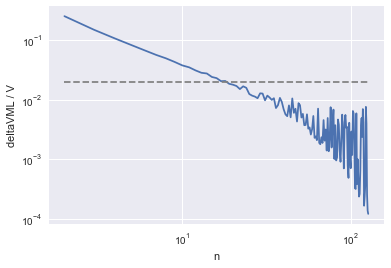

In [333]:
plt.plot(nList, readMargin)
plt.xlabel("n")
plt.ylabel("deltaVML / V")
plt.plot([2, 128], [0.02, 0.02], c='gray', ls='--')
plt.xscale('log')
plt.yscale('log')
plt.savefig("figures/camread_margin_v_Rhrs{:.0e}_Ron{:.0e}.png".format(rHRS, rON), dpi=300, figsize=(10,12))
plt.show()

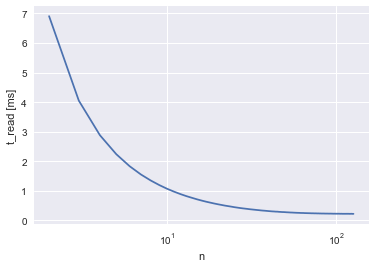

In [334]:
plt.plot(nList, readTime)
plt.xlabel("n")
plt.ylabel("t_read [ms]")
plt.xscale('log')
plt.savefig("figures/camread_margin_t_Rhrs{:.0e}_Ron{:.0e}.png".format(rHRS, rON), dpi=300, figsize=(10,12))
plt.show()